In [1]:
pip install prophet openpyxl matplotlib


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/13.3 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/13.3 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/13.3 MB 1.4 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/13.3 MB 1.7 MB/s eta 0:00:07
   -------- ------------------------------- 2.9/13.3 MB 1.8 MB/s eta 0:00:06
   ---------- ----------------------------- 3.4/13.3 MB 1.9 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/13.3 MB 1.9 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/13.3 MB 1.9 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/13.3 MB 1.9 MB/s eta 0:00:06
   ----------

In [7]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


19:00:05 - cmdstanpy - INFO - Chain [1] start processing
19:00:06 - cmdstanpy - INFO - Chain [1] done processing


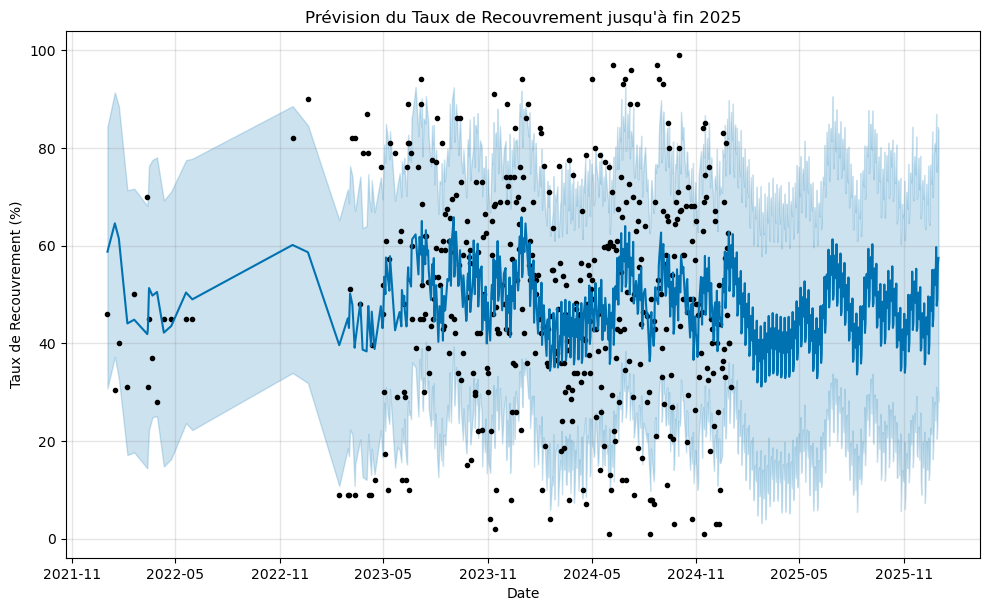

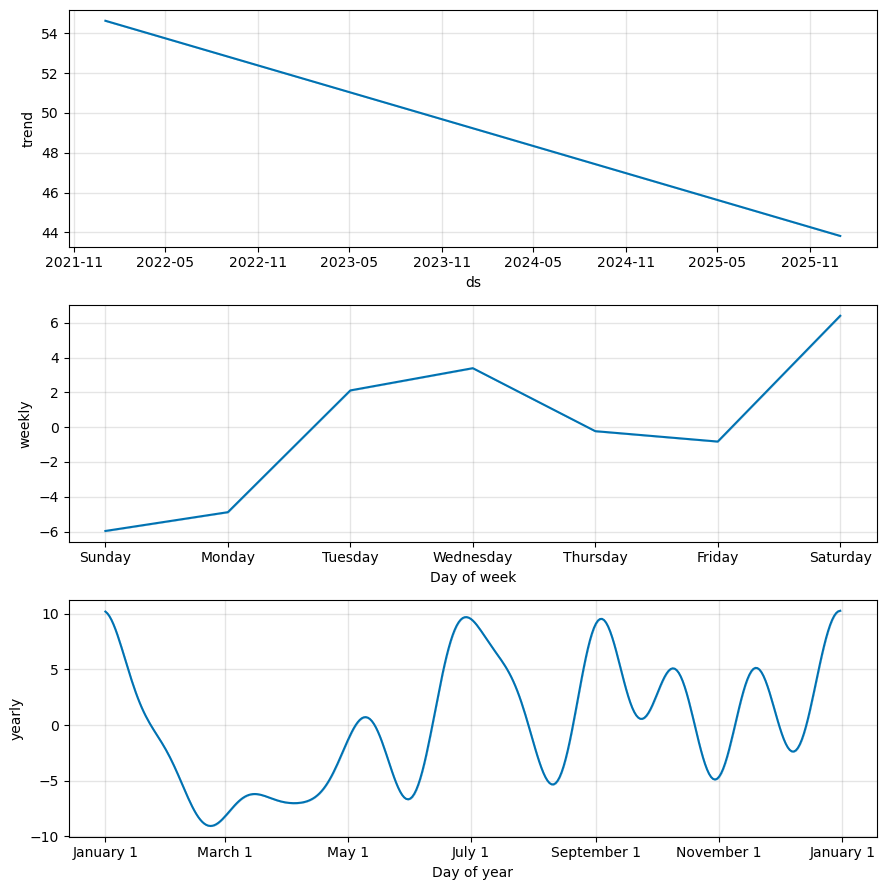

In [ ]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\guerf\\OneDrive\\Bureau\\Talend\\TOS_DI-20211109_1610-V8.0.1\\workspace\\recouvrement.xls", sheet_name='recouvrement')

df['ds'] = pd.to_datetime(df['ID_DATE'].astype(str), format='%Y%m%d')

df_prophet = df.groupby('ds')['TAUX_RECOUVREMENT'].mean().reset_index()
df_prophet.rename(columns={'TAUX_RECOUVREMENT': 'y'}, inplace=True)

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title("Prévision du Taux de Recouvrement jusqu'à fin 2025")
plt.xlabel("Date")
plt.ylabel("Taux de Recouvrement (%)")
plt.grid(True)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

df_all.to_excel("prediction_et_reel_2022_2025.xlsx", index=False)

            ds       yhat  yhat_lower  yhat_upper
447 2025-01-01  60.086892   32.736040   87.339705
448 2025-01-02  56.296103   30.657044   83.496270
449 2025-01-03  55.439934   29.917859   81.595105
450 2025-01-04  62.330333   35.735707   89.059631
451 2025-01-05  49.558817   22.706811   76.026022
452 2025-01-06  50.172006   24.291610   74.009394
453 2025-01-07  56.652348   31.044876   83.937101
454 2025-01-08  57.376279   30.037162   84.756829
455 2025-01-09  53.176584   26.706936   79.307709
456 2025-01-10  51.981176   24.575437   78.725954


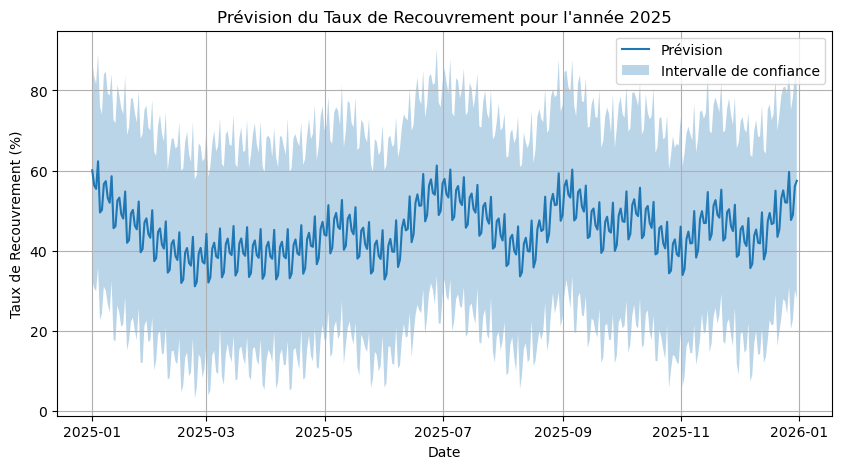

In [ ]:
forecast_2025 = forecast[forecast['ds'].dt.year == 2025][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

print(forecast_2025.head(10))

plt.figure(figsize=(10, 5))
plt.plot(forecast_2025['ds'], forecast_2025['yhat'], label='Prévision')
plt.fill_between(forecast_2025['ds'], forecast_2025['yhat_lower'], forecast_2025['yhat_upper'], alpha=0.3, label='Intervalle de confiance')
plt.title("Prévision du Taux de Recouvrement pour l'année 2025")
plt.xlabel("Date")
plt.ylabel("Taux de Recouvrement (%)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
forecast_2025 = forecast[forecast['ds'].dt.year == 2025][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

forecast_2025['mois'] = forecast_2025['ds'].dt.strftime('%Y-%m')

monthly_avg = forecast_2025.groupby('mois').agg({
    'yhat': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

monthly_avg = monthly_avg.round(2)

print(monthly_avg)


       mois   yhat  yhat_lower  yhat_upper
0   2025-01  50.06       23.31       77.15
1   2025-02  39.28       12.62       66.32
2   2025-03  39.06       12.18       66.18
3   2025-04  40.31       13.33       67.44
4   2025-05  43.59       16.57       70.41
5   2025-06  47.42       20.43       74.37
6   2025-07  50.59       23.49       77.59
7   2025-08  44.19       17.50       71.16
8   2025-09  49.04       22.19       76.26
9   2025-10  45.49       18.32       72.25
10  2025-11  45.72       18.60       72.52
11  2025-12  46.80       19.71       73.97
